# Dynamic Simulation of Enter Service Performance

In [1]:
from opender import DER, DER_PV
import matplotlib.pyplot as plt

### Enter Service Ramp

In [2]:
# Create OpenDER object and configure enter service delay as 50s, enter service ramp time as 100s
der_obj = DER_PV()
der_obj.der_file.ES_DELAY = 50
der_obj.der_file.ES_RAMP_RATE = 100

In [3]:
# Initialize DER in Trip state
der_obj.der_file.STATUS_INIT = 'OFF'
der_obj.der_file.ES_PERMIT_SERVICE = False
der_obj.update_der_input(v_pu=1, f=60, p_dc_pu=1)

In [4]:
# Configure dynamic simulation timestep
t_s = 1
DER.t_s = t_s
t = 0

In [5]:
# Prepare arrays for plotting
t_plot = []
v_plot = []
p_plot = []
stat_plot = []

In [6]:
# Simulate for 200s
while t < 200:
    
    # At 25s, permit DER to enter service
    if t> 25:
        der_obj.der_file.ES_PERMIT_SERVICE = True

    # calculate output power each time step
    P, Q = der_obj.run()

    # save result
    t_plot.append(t)
    p_plot.append(der_obj.p_out_pu)
    stat_plot.append(der_obj.der_status)
    v_plot.append(der_obj.der_input.v_meas_pu)

    # increase t
    t = t + t_s

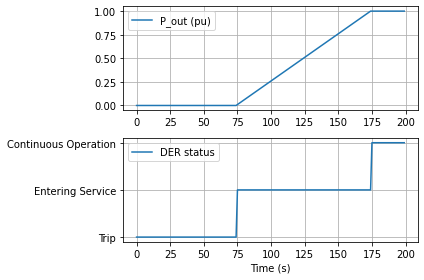

In [7]:
# plot figure
fig = plt.figure()
plt.clf()
ax1=plt.subplot(2, 1, 1)
plt.plot(t_plot, p_plot, label='P_out (pu)')
plt.grid()
plt.legend()
plt.subplot(2, 1, 2, sharex=ax1)
plt.plot(t_plot, stat_plot, label='DER status')
plt.grid()
plt.legend()
plt.xlabel('Time (s)')
plt.tight_layout()
plt.show()

Notice the DER takes a delay of 50s after receiving the permit service signal, before entering service. The enter service ramp takes 100s.

### Enter Service Randomized Delay

In [8]:
# Reset DER, disable enter service ramp, and enable randomized delay
der_obj.reinitialize()
der_obj.der_file.ES_PERMIT_SERVICE = False
der_obj.update_der_input(v_pu=1, f=60, p_dc_pu=1)
der_obj.der_file.ES_RAMP_RATE = 0
der_obj.der_file.ES_RANDOMIZED_DELAY = 100

In [9]:
# Configure dynamic simulation timestep
t_s = 1
DER.t_s = t_s
t = 0

In [10]:
# Prepare arrays for plotting
t_plot = []
v_plot = []
p_plot = []
stat_plot = []

In [11]:
# Simulate for 200s
while t < 200:
    
    # At 25s, permit DER to enter service
    if t> 25:
        der_obj.der_file.ES_PERMIT_SERVICE = True

    # calculate output power each time step
    P, Q = der_obj.run()

    # save result
    t_plot.append(t)
    p_plot.append(der_obj.p_out_pu)
    stat_plot.append(der_obj.der_status)
    v_plot.append(der_obj.der_input.v_meas_pu)

    # increase t
    t = t + t_s

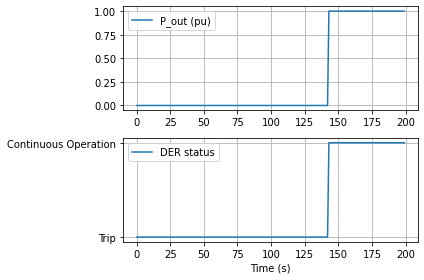

In [12]:
# plot figure
fig = plt.figure()
plt.clf()
ax1=plt.subplot(2, 1, 1)
plt.plot(t_plot, p_plot, label='P_out (pu)')
plt.grid()
plt.legend()
plt.subplot(2, 1, 2, sharex=ax1)
plt.plot(t_plot, stat_plot, label='DER status')
plt.grid()
plt.legend()
plt.xlabel('Time (s)')
plt.tight_layout()
plt.show()

Notice the DER took an additional randomized delay of 100s after the 50s delay to enter service. This is an exception to the ramp start for DER plants < 500kVA.